# Practica 3: Histograma para generar vectores de caractersticas

### 1. Objetivos

El alumno:
* Aprendera a calcular el histograma global y local de la imagen
* Entendera como calcular la distancia de error entre dos histogramas

### 2. Introduccion


### 3. Desarrollo

In [1020]:
import cv2
import scipy
from skimage import util
from skimage import color
from skimage import exposure
from skimage import measure
from skimage import morphology
from skimage.filters import rank
from skimage import img_as_ubyte
from scipy import signal
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### A.1 Ecualizacion local

Realizar la ecualizacion del histograma local, definido por una ventana de nxn pixeles.

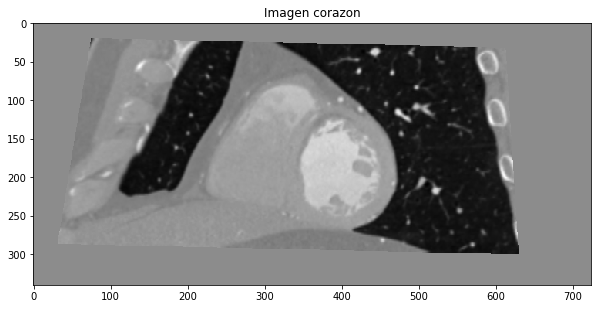

In [971]:
imgs = []
imgs3 = []

for i in range(1,11):
    imgs.append(cv2.imread('im_1_'+str(i)+'.png', 0))
    imgs3.append(cv2.imread('im_3_'+str(i)+'.png', 0))
    
plt.figure(figsize=(10,7))
plt.imshow(imgs[7], cmap='gray')
plt.title('Imagen corazon')
plt.show()

In [972]:
# Ecualizacion local de la imagen 
im_local_eq7 = rank.equalize(imgs[7], selem=np.ones((7,7)))
im_local_eq11 = rank.equalize(imgs[7], selem=np.ones((11,11)))

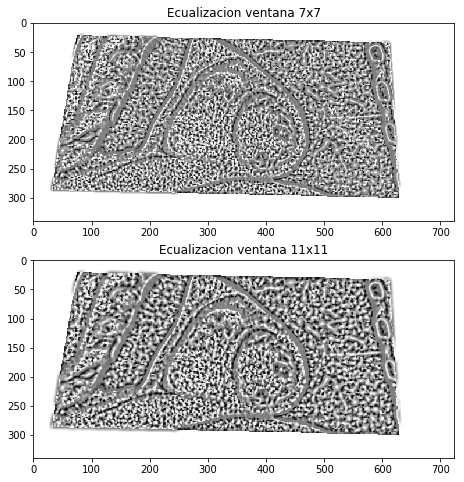

In [973]:
plt.figure(figsize=(13,8))
plt.subplot(211)
plt.imshow(im_local_eq7, cmap='gray')
plt.title('Ecualizacion ventana 7x7')
plt.subplot(212)
plt.imshow(im_local_eq11, cmap='gray')
plt.title('Ecualizacion ventana 11x11')
plt.show()

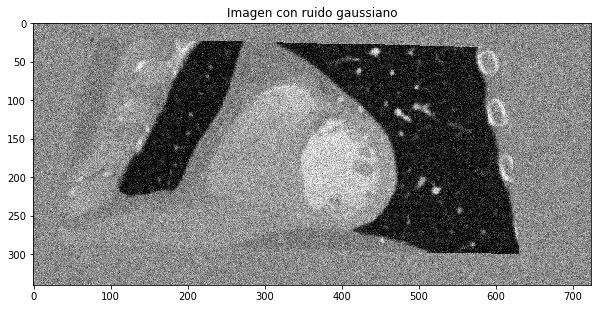

In [974]:
# Agregar ruido gaussiano a la imagen
im_noise = util.random_noise(imgs[7], mode='gaussian', var=0.01)

plt.figure(figsize=(10,7))
plt.imshow(im_noise, cmap='gray')
plt.title('Imagen con ruido gaussiano')
plt.show()

In [975]:
# Ecualizacion de las imagenes con ruido
im_nleq33 = rank.equalize(imgs[7], selem=np.ones((3,3)))
im_nleq55 = rank.equalize(imgs[7], selem=np.ones((15,15)))

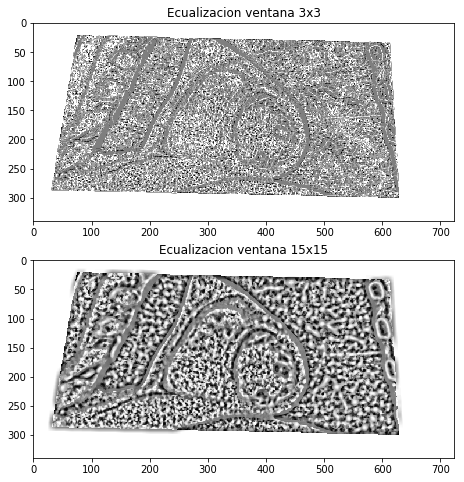

In [976]:
plt.figure(figsize=(13,8))
plt.subplot(211)
plt.imshow(im_nleq33, cmap='gray')
plt.title('Ecualizacion ventana 3x3')
plt.subplot(212)
plt.imshow(im_nleq55, cmap='gray')
plt.title('Ecualizacion ventana 15x15')
plt.show()

### A.2 Distancia Chi-Square entre histogramas

Se calcula la distancia Chi-Square entre los histogramas de la imagen original con respecto a su version filtrada.

In [977]:
# Convolucion de las imagenes con el filtro binomial 7x7
bin7 = np.array([1,6,15,20,15,6,1])                          
binKernel =  np.outer(bin7, bin7)       
binKernel = binKernel * (1/np.sum(binKernel)) 

imgs_binomial = []

for i in range(10):
    imgs_binomial.append(signal.convolve2d(imgs[i], binKernel, 'same'))

In [978]:
# Concatenacion de las imagenes filtradas
a1 = np.hstack((imgs_binomial[7], imgs_binomial[1]))
a2 = np.hstack((imgs_binomial[2], imgs_binomial[3]))
a3 = np.vstack((a1, a2))

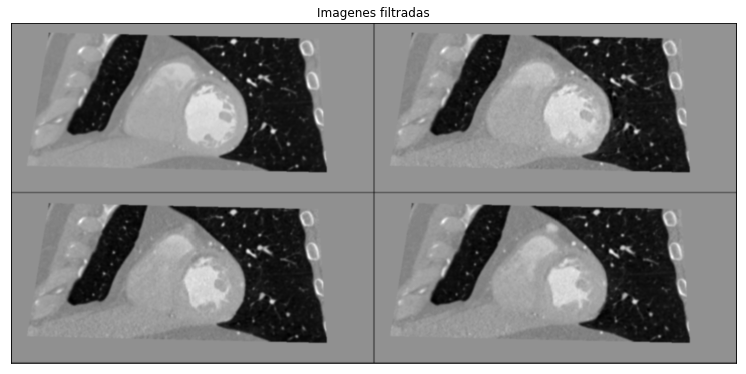

In [979]:
plt.figure(figsize=(13,8))
plt.imshow(a3, cmap='gray')
plt.title('Imagenes filtradas')
plt.xticks([])
plt.yticks([])
plt.show()

In [980]:
# Calculo de los histogramas

imgs_hist = []
imgs_bin_hist = []

for i in range(10):
    imgs_hist.append(exposure.histogram(imgs[i], nbins=256))
    imgs_bin_hist.append(exposure.histogram(imgs_binomial[i], nbins=256))

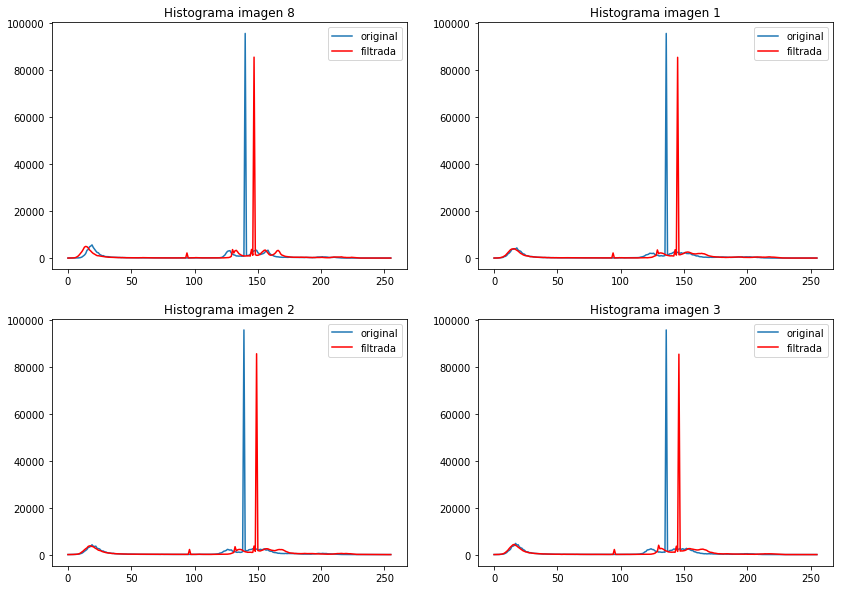

In [981]:
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.plot(imgs_hist[7][0])
plt.plot(imgs_bin_hist[7][0], 'r')
plt.legend(['original', 'filtrada'])
plt.title('Histograma imagen 8')
plt.subplot(222)
plt.plot(imgs_hist[0][0])
plt.plot(imgs_bin_hist[0][0], 'r')
plt.legend(['original', 'filtrada'])
plt.title('Histograma imagen 1')
plt.subplot(223)
plt.plot(imgs_hist[1][0])
plt.plot(imgs_bin_hist[1][0], 'r')
plt.legend(['original', 'filtrada'])
plt.title('Histograma imagen 2')
plt.subplot(224)
plt.plot(imgs_hist[2][0])
plt.plot(imgs_bin_hist[2][0], 'r')
plt.legend(['original', 'filtrada'])
plt.title('Histograma imagen 3')
plt.show()

In [982]:
# Funcion que calcula la distancia chi-square entre dos histogramas
def chi_square(hist1, hist2):
    d = 0
    for n1, n2 in zip(hist1, hist2):
        d += np.square(n1-n2)
    return d

In [983]:
print('Distancia entre histogramas:\n')
print('Imagen 8')
print('original vs filtrada:', chi_square(imgs_hist[7][0], imgs_bin_hist[7][0]))
print('original vs original: ', chi_square(imgs_hist[7][0], imgs_hist[7][0]))
print('\nImagen 1')
print('original vs filtrada:', chi_square(imgs_hist[0][0], imgs_bin_hist[0][0]))
print('original vs original: ', chi_square(imgs_hist[0][0], imgs_hist[0][0]))
print('\nImagen 2')
print('original vs filtrada:', chi_square(imgs_hist[1][0], imgs_bin_hist[1][0]))
print('original vs original: ', chi_square(imgs_hist[1][0], imgs_hist[1][0]))
print('\nImagen 3')
print('original vs filtrada:', chi_square(imgs_hist[2][0], imgs_bin_hist[2][0]))
print('original vs original: ', chi_square(imgs_hist[2][0], imgs_hist[2][0]))

Distancia entre histogramas:

Imagen 8
original vs filtrada: 15915168348
original vs original:  0

Imagen 1
original vs filtrada: 15826446324
original vs original:  0

Imagen 2
original vs filtrada: 15883192296
original vs original:  0

Imagen 3
original vs filtrada: 15901074538
original vs original:  0


In [984]:
'''
https://scicomp.stackexchange.com/questions/5110/python-oss-alternatives-for-matlab-neural-network-toolbox-any-intercomparisons
https://scicomp.stackexchange.com/questions/22108/open-source-tool-comparable-to-matlab-neural-network-tool-box
http://deeplearning.net/software/pylearn2/
http://deeplearning.net/software/theano/

'''

'\nhttps://scicomp.stackexchange.com/questions/5110/python-oss-alternatives-for-matlab-neural-network-toolbox-any-intercomparisons\nhttps://scicomp.stackexchange.com/questions/22108/open-source-tool-comparable-to-matlab-neural-network-tool-box\nhttp://deeplearning.net/software/pylearn2/\nhttp://deeplearning.net/software/theano/\n\n'

### B.1 Reconocimiento mediante analisis del histograma

Se define una serie de parches que se ubican en la region del ventriculo para calcular su histograma y formar uno nuevo con el promedio de los histogramas.

Posteriormente, se realiza un 'barrido' en la imagen, calculando el histograma de forma local para cada region definida por el parche y obtener la distancia chi-square con respecto al histograma promedio.

In [985]:
# Creacion del parche y la mascara para calcular el histograma en la imagen
psize = 30                                                              
patch = np.ones((psize, psize), dtype='uint8')

# Coordenadas parche 1
xy1m1 = (370, 150)
xy2m1 = (370+psize, 150+psize)
# Coordenadas parche 2
xy1m2 = (350, 190)
xy2m2 = (350+psize, 190+psize)
# Coordenadas parche 3
xy1m3 = (400, 200)
xy2m3 = (400+psize, 200+psize)

mask1 = np.pad(patch, ((xy1m1[1], 340-xy2m1[1]), (xy1m1[0], 724-xy2m1[0])), 'constant')
mask2 = np.pad(patch, ((xy1m2[1], 340-xy2m2[1]), (xy1m2[0], 724-xy2m2[0])), 'constant')
mask3 = np.pad(patch, ((xy1m3[1], 340-xy2m3[1]), (xy1m3[0], 724-xy2m3[0])), 'constant')

In [986]:
mask1.shape

(340, 724)

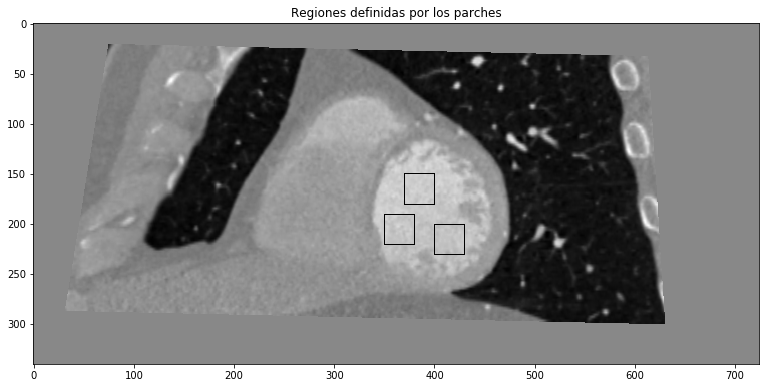

In [987]:
# Ubicacion del parche que se uso para calcular el histograma promedio
plt.figure(figsize=(13,8))
img_label = imgs[0].copy()

plt.imshow(cv2.rectangle(img_label, xy1m1, xy2m1,(0)), cmap='gray')
plt.imshow(cv2.rectangle(img_label, xy1m2, xy2m2,(0)), cmap='gray')
plt.imshow(cv2.rectangle(img_label, xy1m3, xy2m3,(0)), cmap='gray')
plt.title('Regiones definidas por los parches')
plt.show()

In [988]:
# Calcular el histograma en el parche definido
hist_mask1 = cv2.calcHist([imgs[0]], None, mask1, [256], [0,255])
hist_mask2 = cv2.calcHist([imgs[0]], None, mask2, [256], [0,255])
hist_mask3 = cv2.calcHist([imgs[0]], None, mask3, [256], [0,255])

In [989]:
# Calcular el histograma promedio
hist_avg = np.zeros((256,1))

hist_avg = (hist_mask1 + hist_mask2 + hist_mask3)/3

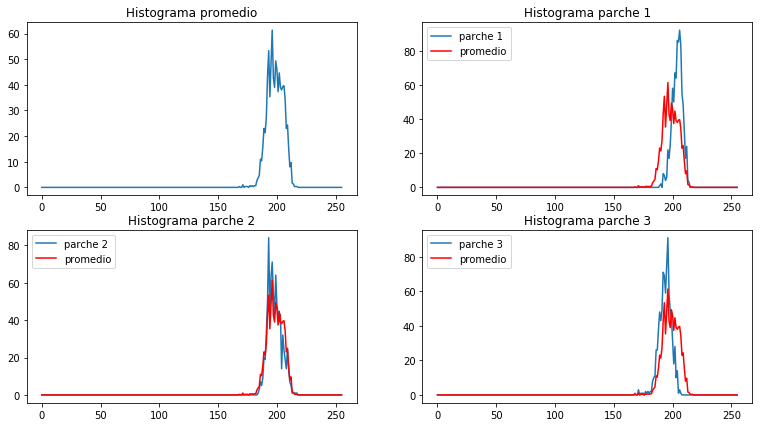

In [1016]:
plt.figure(figsize=(13,7))
plt.subplot(221)
plt.plot(hist_avg)
plt.title('Histograma promedio')
plt.subplot(222)
plt.plot(hist_mask1)
plt.plot(hist_avg, 'r')
plt.legend(['parche 1', 'promedio'])
plt.title('Histograma parche 1')
plt.subplot(223)
plt.plot(hist_mask2)
plt.plot(hist_avg, 'r')
plt.legend(['parche 2', 'promedio'])
plt.title('Histograma parche 2')
plt.subplot(224)
plt.plot(hist_mask3)
plt.plot(hist_avg, 'r')
plt.legend(['parche 3', 'promedio'])
plt.title('Histograma parche 3')
plt.show()

In [991]:
# Barrido del parche sobre la imagen

def err_distance(img, hist_avg, patch, psize):
    '''
        Calcula el mapa de distancias usando el histograma promedio como referencia.
        Para ello realiza un barrido sobre la imagen, calculando de forma local los
        histogramas en cada region definida por el parche
    '''
    x1, y1 = 0, 0
    x2, y2 = 0, 0
    local_hists = []                                        # Histogramas locales
    err_dist = np.full(img.shape, 850000)               # Distancias entre histogramas
    err_mask = np.zeros(img.shape, dtype='uint8')       # Imagen binaria (regiones con menor distancias)
  
    for i in range(0, img.shape[0]-psize, psize):
        for j in range(0, img.shape[1]-psize, psize):
            # Determinar las coordenadas de 2 vertices de la region
            # para obtener una mascara, se usara para calcular el 
            # histograma en la region de interes
            x1, y1 = j, i
            x2, y2 = x1+psize, y1+psize
            # Creacion de la mascara con el parche
            mask = np.pad(patch, ((y1, img.shape[0]-y2), (x1, img.shape[1]-x2)), 'constant')
            local_hist = cv2.calcHist([img], None, mask, [256], [0,255])
            local_hists.append(local_hist)
            # Calculo de la distancia entre histogramas (promedio y local)
            hdistance = chi_square(hist_avg, local_hist)
            err_dist[y1:y2, x1:x2] = hdistance
            
    return err_dist

In [992]:
err_dist = err_distance(imgs[0], hist_avg, patch, psize)
err_dist2 = err_distance(imgs[1], hist_avg, patch, psize)
err_dist3 = err_distance(imgs[5], hist_avg, patch, psize)
err_dist4 = err_distance(imgs[6], hist_avg, patch, psize)

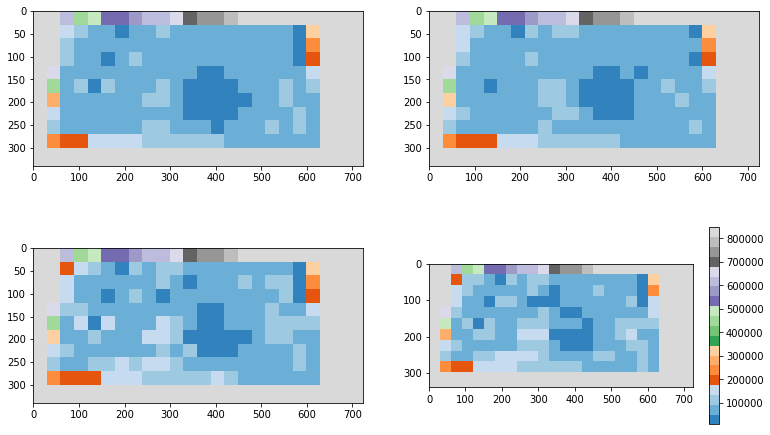

In [1015]:
plt.figure(figsize=(13,8))
plt.subplot(221)
plt.imshow(err_dist, cmap='tab20c')
plt.subplot(222)
plt.imshow(err_dist2, cmap='tab20c')
plt.subplot(223)
plt.imshow(err_dist3, cmap='tab20c')
plt.subplot(224)
plt.imshow(err_dist4, cmap='tab20c')
plt.colorbar()
plt.show()

In [994]:
# Binarizacion del mapa de distancias
err_mask = err_dist < 50000    
# Conversion de boolean a entero 
err_mask = err_mask * 1   
# Aplicar transformacion morfologica a la mascara
opening = cv2.morphologyEx(err_mask.astype(np.float32), cv2.MORPH_OPEN, np.ones((40,40)))

In [995]:
# Binarizacion del mapa de distancias
err_mask2 = err_dist2 < 50000    
# Conversion de boolean a entero 
err_mask2 = err_mask2 * 1   
# Aplicar transformacion morfologica a la mascara
opening2 = cv2.morphologyEx(err_mask2.astype(np.float32), cv2.MORPH_OPEN, np.ones((40,40)))

In [996]:
# Binarizacion del mapa de distancias
err_mask3 = err_dist3 < 50000    
# Conversion de boolean a entero 
err_mask3 = err_mask3 * 1   
# Aplicar transformacion morfologica a la mascara
opening3 = cv2.morphologyEx(err_mask3.astype(np.float32), cv2.MORPH_OPEN, np.ones((40,40)))

In [1013]:
# Binarizacion del mapa de distancias
err_mask4 = err_dist4 < 50000
# Conversion de boolean a entero 
err_mask4 = err_mask4 * 1   
# Aplicar transformacion morfologica a la mascara
opening4 = cv2.morphologyEx(err_mask4.astype(np.float32), cv2.MORPH_OPEN, np.ones((60,60)))

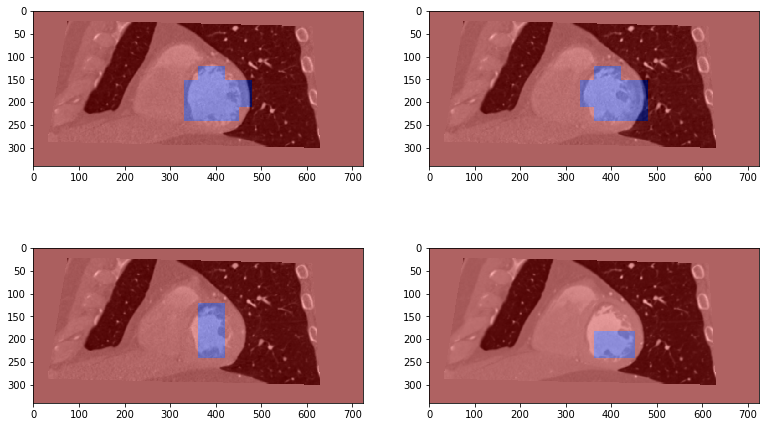

In [1014]:
plt.figure(figsize=(13, 8))
plt.subplot(221)
plt.imshow(color.label2rgb(opening, image=imgs[0]))
plt.subplot(222)
plt.imshow(color.label2rgb(opening2, image=imgs[1]))
plt.subplot(223)
plt.imshow(color.label2rgb(opening3, image=imgs[2]))
plt.subplot(224)
plt.imshow(color.label2rgb(opening4, image=imgs[6]))
plt.show()

### B.2 Estadisticas del histograma
Se forma un vector de caracteristicas usando como informacion:

1. Media
2. Varianza
3. Momentos (n=4)
4. Entropia

In [1043]:
h = [hist_mask1, hist_mask2, hist_mask3]

h_p = []


for hist in h:
    mean = np.mean(hist)
    var = np.var(hist)
    moment = scipy.stats.moment(hist, moment=4)[0]
    entropy = scipy.stats.entropy(hist)[0]
    h_p.append([mean, var, moment, entropy])

In [1057]:
print('   media   varianza   momento    entropia')
for n in h_p:
    print(n)

   media   varianza   momento    entropia
[3.515625, 201.78096, 971052.25, 2.8415065]
[3.515625, 151.78098, 456285.22, 3.1169171]
[3.515625, 171.56221, 636778.4, 3.0163276]


In [1036]:
scipy.stats.moment(hist_mask1, moment=4)
scipy.stats.entropy(hist_avg)

array([3.279737], dtype=float32)